## Only transmon and cavity

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as linalg
import math
import time

# Parameters
d = 0.35 #squid asymmetry
g = 0.08 #transmon cavity coupling
Wq0 = 3.474 #dressed qubit frequency
Wc0 = 7.192 #dressed cavity frequency
lamb_shift  = g**2/(Wc0 - Wq0)
Wc = Wc0 - lamb_shift #bare cavity
Wq = Wq0 + lamb_shift #bare qubit


gamma_L = 0 # chain coupling to the left josephson junction
gamma_R = 0 # chain coupling to the right josephson junction
t = 0.1 # chain hopping
E_C = 0.06 # charging energy
E_J_max = (Wq+E_C)**2/8/E_C
# E_J1 = 1
# E_J2 = E_J1
n_g = 0
N = 0 # number of chain fermions
n_0 = 10 #number of CP
steps = 200
flux_0 = 1 #2.067833*10**(-15)
flux_array = np.linspace(0,flux_0,steps)
num_of_eigen = 4

max_num_photons = 6 #number of photons



# Defining the single spin operators s_x, s_y, s_z:
s_x = 0.5*np.array([[0,1],[1,0]], dtype=complex)
s_y = 0.5*np.array([[0,-1j],[1j,0]], dtype=complex)
s_z = 0.5*np.array([[1,0],[0,-1]], dtype=complex)

s_plus = s_x + 1j*s_y
s_minus = s_x - 1j*s_y

# Defining the creation and annihilation operators for the SCs
exp_phi_plus = np.diag(np.ones(2*n_0, dtype=complex), k=-1) # Creation
exp_phi_minus = np.diag(np.ones(2*n_0, dtype=complex), k=1)# Annihilation

In [67]:

def H_T2(E_C = E_C, n_0 = n_0, n_g = n_g, E_J_max = E_J_max, d = d, flux=0): #N is the number of cp passed from one sc to the other
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = 4*E_C*(-n_0+i-n_g)**2
    H = np.zeros((2*n_0+1,2*n_0+1))
    H = H + np.diag(D) - (E_J_max/2)*np.sqrt(np.cos(np.pi*flux/flux_0)**2 + (d**2)*np.sin(np.pi*flux/flux_0)**2)*(exp_phi_minus + exp_phi_plus)
    return H



# harmonic osc creation and annihilation
occupation = np.arange(1,max_num_photons+1, dtype=complex)
a_down = np.diag(np.sqrt(occupation), k=1)
a_up = np.diag(np.sqrt(occupation), k=-1)
occupation_operator = a_up @ a_down


def H_cavity(Wc = Wc):
    H = Wc*(a_up @ a_down)
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_cav:", B)
    return H

def H_int_transmon_cavity(g = g, n_0 = n_0, n_g = n_g): # also added the chain's dimension
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = (-n_0+i-n_g)
    H = g*np.kron(np.diag(D),(a_down+a_up))
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_int_trans_cav:", B)
    return H

def H_3(flux):
    H = np.kron(H_T2(flux=flux), np.identity(max_num_photons+1)) + np.kron(np.identity((2*n_0+1)), H_cavity()) + H_int_transmon_cavity()
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_3:", B)
    return H

tic = time.time()

# test to verify my matrix
# H = H_3(flux[2])
# A = np.sum(np.abs(H - np.conj(H.T)))
# print(A)



eigenvalues_diff2 = np.zeros((steps,(2*n_0+1)*(max_num_photons+1)), dtype=complex) # we have num of rows in the size of steps and columns in the size of (2*n_0+1)*(2**N). each row contains all the eigenvalues for specific flux, so each column is a specific eigenvalue for diff fluxes.
eigenvectors_diff2 = np.zeros((steps,(2*n_0+1)*(max_num_photons+1),(2*n_0+1)*(max_num_photons+1)), dtype=complex)# first dim is steps of flux, 2nd and 3rd dims are for the eigenvectors. so if numpy returns the eigenvectors as a matrix where each column corresponds to eigen-energy, dim 2 is the rows of the matrix and dim 3 is the columns.

for i in range(steps):
    H = H_3(flux = flux_array[i])
    current_eigenvalues, current_eigenvectors = np.linalg.eig(H)
    print(i)
    # sort eigenvalues and rearrange corresponding eigenvectors
    sorted_indices = np.argsort(current_eigenvalues) # returns the indices that would sort an array. When you have an array and use np.argsort() on it, it doesn't change the original array, but it provides the indices that would sort the array in ascending order.
    sorted_eigenvalues = current_eigenvalues[sorted_indices]
    sorted_eigenvectors = current_eigenvectors[:, sorted_indices]
    # store results
    eigenvalues_diff2[i,:] = sorted_eigenvalues-sorted_eigenvalues[0] # the difference from the GS
    eigenvectors_diff2[i,:,:] = sorted_eigenvectors

toc = time.time()
print(f"time {toc - tic}s")
print(t)

hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
1
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
2
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
3
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
4
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
5
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
6
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
7
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
8
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
9
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
10
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
11
hermitian of H

Plot of the differences from the GS

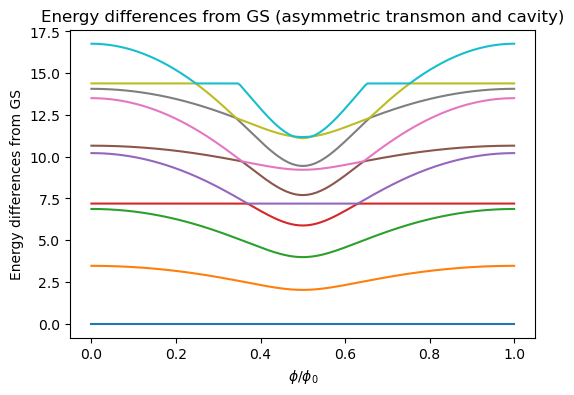

[[[ 5.20790506e-04-0.j  2.44235661e-03-0.j  7.83029681e-03+0.j ...
    3.78342616e-07-0.j  1.44285882e-08-0.j -1.44284497e-08+0.j]
  [ 3.71380346e-05-0.j  1.89097036e-04-0.j  6.53390311e-04+0.j ...
   -1.82468529e-05+0.j -8.41678242e-07+0.j  8.41670430e-07-0.j]
  [ 1.91840194e-06-0.j  1.04881614e-05-0.j  3.87406169e-05+0.j ...
    4.98513393e-04-0.j  2.90273142e-05-0.j -2.90270558e-05+0.j]
  ...
  [ 3.14503961e-09-0.j -1.93590711e-08+0.j  8.01472016e-08+0.j ...
    8.07004659e-02-0.j -9.69499690e-03+0.j -9.69491910e-03+0.j]
  [-1.08907099e-10+0.j  7.05090550e-10-0.j -3.06672750e-09+0.j ...
    3.46204128e-01-0.j -8.60080897e-02+0.j -8.60074537e-02+0.j]
  [ 3.49456014e-12-0.j -2.36873682e-11+0.j  1.07781258e-10+0.j ...
   -4.10465796e-02+0.j -3.52824377e-01+0.j -3.52822044e-01+0.j]]

 [[ 5.20621300e-04-0.j  2.44161298e-03-0.j  7.82809814e-03-0.j ...
   -3.78375723e-07+0.j  1.44299391e-08+0.j -1.44298004e-08+0.j]
  [ 3.71265989e-05-0.j  1.89040638e-04-0.j  6.53204764e-04-0.j ...
    1.82

In [68]:
fig = plt.figure(figsize=(6, 4))
energies = 10
for i in range(energies):
    plt.plot(flux_array,np.real(eigenvalues_diff2[:,i]))

plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel('Energy differences from GS')
plt.title('Energy differences from GS (asymmetric transmon and cavity)')

# Save the figure as an image (e.g., PNG)
filename = f'GS_amount_of_energies_{energies}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
plt.savefig(filename)

# plt.legend()
plt.show()
print(eigenvectors_diff2)

Now I want to plot the difference between any two energies as a function of the flux E_i-E_j when E_i > E_j. also I want to add a color bar and paint the lines in the graph by the transition probability between the levels i and j that is caused from the transmon-cavity coupling meaning the term (a_down+a_up).
I will first create the transition amplitude matrix - M.

In [93]:
amount_of_energies = 7
delta_energy = np.zeros((steps,1)) # contains the energy differences, here i will stack the energies but is descending order! meaning E_7-E_6,E7-E_5,...,E_2-E_1

M = np.zeros_like(delta_energy, dtype=complex) # contains the transition probability due to a_down + a_up, here i will stack the probabilities
operator = np.kron(np.identity((2*n_0+1)),(a_down+a_up)) # that's the operator I want to get the transition probability for
print(operator.shape) # sanity test

for i in range(amount_of_energies-1, -1, -1): # a loop that iterates from 6 to 0 including
    for j in range(i-1, -1, -1): # a loop that iterates from i-1 to 0 including
        diff = eigenvalues_diff2[:,i] - eigenvalues_diff2[:,j] # should be an array with number of rows as "steps" (and flux_array) and one column
        temp = np.hstack((delta_energy, diff.reshape(-1,1))) # here i stack the diff in the delta_energy matrix and reshape the diff column to (-1,1) meaning I want it to be 1 column and the number of rows i leave for numpy to figure out according to the data
        delta_energy = temp
        temp_expectation_vec = np.zeros((steps,1), dtype=complex) # here I want to save the transition probability from j to i for each step because each step have different eigenvectors
        for step in range(steps):
            vec_i = eigenvectors_diff2[step,:,i]
            vec_j = eigenvectors_diff2[step,:,j]
            M_ij = vec_i.conjugate().dot(operator.dot(vec_j))
            temp_expectation_vec[step,0] = M_ij
        temp_M = np.hstack((M, temp_expectation_vec.reshape(-1,1)))
        M = temp_M


M = M[:, 1:] # cutting the first column of zeros
M = np.abs(M)
# M = np.log10(M)
delta_energy = delta_energy[:, 1:] # cutting the first column of zeros
delta_energy = np.abs(delta_energy)
print(M.shape)
print(delta_energy.shape)


(147, 147)
(200, 21)
(200, 21)


Now I will plot the data with colormap

C:\Users\User\AppData\Local\Temp\ipykernel_40580\621951760.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


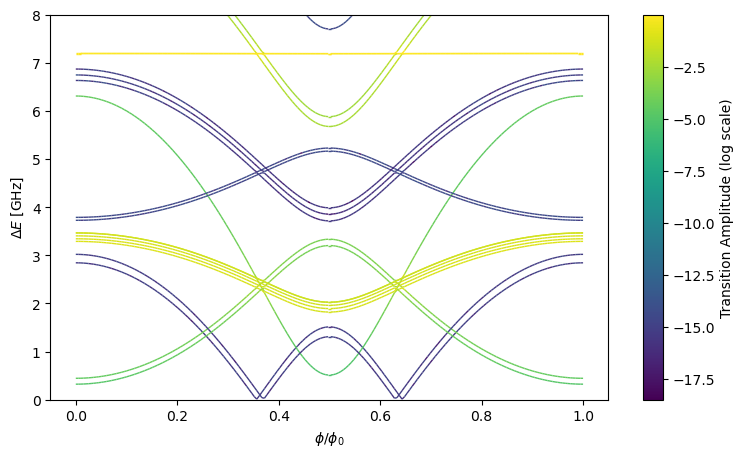

In [101]:
from matplotlib import colors
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection

M_wo_numerical_err = M #np.where(M<1e-14,0,M)

norm = colors.Normalize(vmin=np.min(np.log10(M_wo_numerical_err)),vmax=np.max(np.log10(M_wo_numerical_err))) # normalizes the M values to 0-1
cmap = get_cmap('viridis')
fig, ax = plt.subplots(figsize=(9, 5)) # creates a figure and axes objects. figure contains all the elements of a plot - subplots,titles,labels, legends. axes is an individual plotting area within the fig, this is the plot itself. fig contains the axes (subplots)

for i in range(0, delta_energy.shape[1]):
    points = np.array([flux_array, delta_energy[:,i]]).T.reshape(-1, 1, 2) # shaping the x,y points to a (200,1,2) dim so each entry contains a point x,y
    segments = np.concatenate([points[:-1], points[1:]], axis=1) # points[:-1] removes the last point, points[1:] removes the first point. it only slices along the first dim.
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1) # this object contains the line segments and properties needed to create the lines
    lc.set_array(np.log10(M_wo_numerical_err[:,i])) # used to specify an array of values that will be used to determine the color of each segment in the LineCollection
    ax.add_collection(lc) # add the linecollection to the ax
    if i == 0:
        # Adding colorbar to show the color scale
        cb = plt.colorbar(lc, ax=ax)
        cb.set_label('Transition Amplitude (log scale)')

ax.autoscale() #adjusts the axis limits to fit the data in the subplot
# colorbar = plt.colorbar()
# colorbar.set_label('Custom Value')
plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel(r'$\Delta E$ [GHz]')
# plt.title('Energy differences (asymmetric transmon and cavity)')
plt.ylim(0, 8)
# Include parameter values in the legend without lines
# legend_parameter_values = [f'gamma_L: {gamma_L}', f'gamma_R: {gamma_R}', f'tunneling in the chain: {t}']
# handles = [plt.Line2D([], [], linestyle='None', label=value) for value in legend_parameter_values]
# ax.legend(handles=handles)

# Save the figure as an image (e.g., PNG)
filename = f'amount_of_energies_{amount_of_energies}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
plt.savefig(filename)

plt.show()

Adding a plot of s(w,phi) in 2d plot - First order FGR

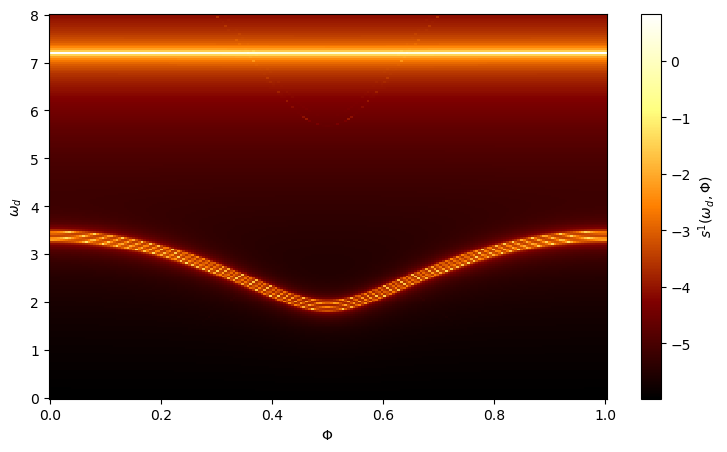

In [102]:
# Generate the flux and omega arrays
omega_array = np.linspace(0,8,num = 200)
kapa = 0.002
# Create a meshgrid of flux and omega values
flux_grid, omega_grid = np.meshgrid(np.pi*flux_array, omega_array)

# Define a function that computes the color value based on flux and omega
def color_function(flux, omega): # flux and omega are 2d arrays where the y-axis (0 axis - rows) is the size of omega_array and the x-axis (1 axis - columns) is the size of flux_array.
    s = np.zeros_like(flux)
    for i in range(omega.shape[0]): #amount of omegas
        for j in range(flux.shape[1]): #amount of fluxes
            temp = 0
            for k in range(M.shape[1]):#axis 1 of M is the amount of energy differences
                temp += (M[j,k]**2)*(kapa**2)/((delta_energy[j,k]-omega[i,j])**2 + kapa**2)
            s[i,j] = 2*np.pi*temp
    return s

# Compute the color values for each combination of flux and omega. This is a 2d array of size omega_array X flux_array
color_values = color_function(flux_grid, omega_grid)

# Create a 2D density plot
plt.figure(figsize=(9, 5))
plt.pcolormesh(flux_array, omega_array, np.log10(color_values), cmap='afmhot')  # Adjust the colormap as needed
plt.colorbar(label=r'$s^1(\omega_d,\Phi)$')  # Add a color bar for reference
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$\omega_d$')
# plt.title('2D Density Plot - asymmetric transmon + cavity')

# Save the figure as an image (e.g., PNG)
filename = f'density_s(w,phi)_amount_of_energies_{energies}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
plt.savefig(filename)

plt.show()


Adding a plot of s(w,phi) in 2d plot - Second order FGR

In [96]:
amount_of_energies_2 = 7
amount_of_energy_diff = np.sum(list(range(amount_of_energies_2)))
delta_energy_2 = np.zeros((steps,amount_of_energies_2,amount_of_energies_2), dtype=complex) # contains the energy differences, here i will put the energies but is ascending order! meaning E1-E2,E1-E3,E1-E4,...,E5-E6,E5-E7,E6-E7
M_2 = np.zeros_like(delta_energy_2, dtype=complex) # contains the transition probability due to a_down + a_up, here i will put the probabilities. It will contain <i|a_down+a_up|j> in the i'th row and j'th column
operator_2 = np.kron(np.identity((2*n_0+1)),(a_down+a_up)) # that's the operator I want to get the transition probability for
print(operator_2.shape) # sanity test

for i in range(amount_of_energies_2): # a loop that iterates from 0 to 6 including
    for j in range(amount_of_energies_2): # a loop that iterates from 0 to 6 including
        diff = eigenvalues_diff2[:,i] - eigenvalues_diff2[:,j] # should be an array with number of rows as "steps" (and flux_array) and one column
        delta_energy_2[:,i,j] = diff
        temp_expectation_vec = np.zeros((steps,1), dtype=complex)
        for step in range(steps):
            vec_i = eigenvectors_diff2[step,:,i]
            vec_j = eigenvectors_diff2[step,:,j]
            M_ij = vec_i.conj().dot(operator_2.dot(vec_j))# here I want to save the transition probability from j to i for each step because each step have different eigenvectors
            M_2[step,i,j] = M_ij


M_2 = np.abs(M_2)
delta_energy_2 = np.abs(delta_energy_2)
print(M_2.shape)
print(delta_energy_2.shape)
print("are the eigenvalues complex?:",np.iscomplex(eigenvalues_diff2).any())


(147, 147)
(200, 7, 7)
(200, 7, 7)
are the eigenvalues complex?: False


(200, 21)


C:\Users\User\AppData\Local\Temp\ipykernel_40580\2028558641.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('seismic')


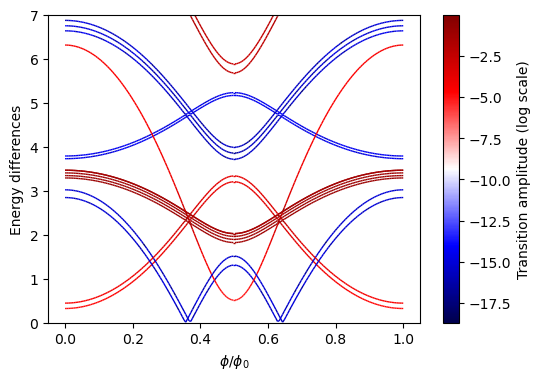

In [97]:
from matplotlib import colors
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection

# M_2 and delta energy are (200,7,7) mat where each layer is <i|a_up+a_down|j> i want to get only the upper triangle of each layer (k=1) and make it 1D and put in a matrix of (200,21)
M_temp = np.zeros((steps,amount_of_energy_diff))
print(M_temp.shape)
delta_energy_temp = np.zeros_like(M_temp)
upper_triangle_indices = np.triu_indices(M_2.shape[1],k=1)
for i in range(M_2.shape[0]):
    upper_triangle = M_2[i][upper_triangle_indices]
    M_temp[i,:] = upper_triangle
    delta_energy_temp[i,:] = delta_energy_2[i][upper_triangle_indices]

norm = colors.Normalize(vmin=np.min(np.log10(M_temp)),vmax=np.max(np.log10(M_temp))) # normalizes the M values to 0-1
cmap = get_cmap('seismic')
fig, ax = plt.subplots(figsize=(6, 4)) # creates a figure and axes objects. figure contains all the elements of a plot - subplots,titles,labels, legends. axes is an individual plotting area within the fig, this is the plot itself. fig contains the axes (subplots)

for i in range(0, amount_of_energy_diff):
    points = np.array([flux_array, delta_energy_temp[:,i]]).T.reshape(-1, 1, 2) # shaping the x,y points to a (200,1,2) dim so each entry contains a point x,y
    segments = np.concatenate([points[:-1], points[1:]], axis=1) # points[:-1] removes the last point, points[1:] removes the first point. it only slices along the first dim.
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1) # this object contains the line segments and properties needed to create the lines
    lc.set_array(np.log10(M_temp[:,i])) # used to specify an array of values that will be used to determine the color of each segment in the LineCollection
    ax.add_collection(lc) # add the linecollection to the ax
    if i == 0:
        # Adding colorbar to show the color scale
        cb = plt.colorbar(lc, ax=ax)
        cb.set_label('Transition amplitude (log scale)')

ax.autoscale() #adjusts the axis limits to fit the data in the subplot
# colorbar = plt.colorbar()
# colorbar.set_label('Custom Value')
plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel('Energy differences')
# plt.title('Energy differences (asymmetric transmon and cavity)')
plt.ylim(0, 7)
# Include parameter values in the legend without lines
# legend_parameter_values = [f'gamma_L: {gamma_L}', f'gamma_R: {gamma_R}', f'tunneling in the chain: {t}']
# handles = [plt.Line2D([], [], linestyle='None', label=value) for value in legend_parameter_values]
# ax.legend(handles=handles)

# Save the figure as an image (e.g., PNG)
filename = f'amount_of_energies_{amount_of_energies}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
plt.savefig(filename)

plt.show()

### This is second order only!

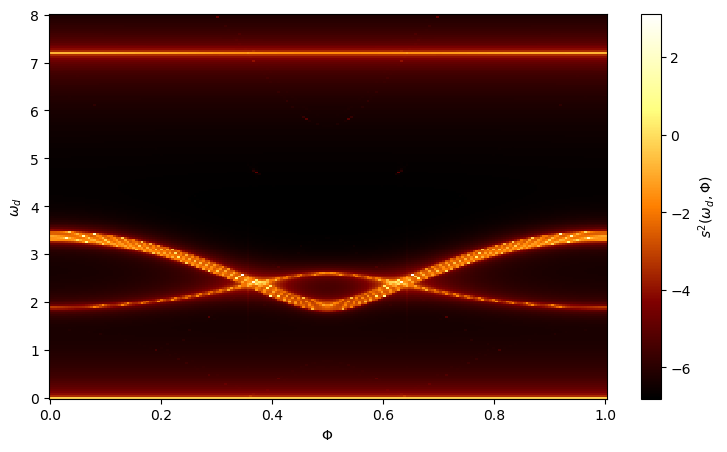

In [103]:
# Generate the flux and omega arrays
omega_array = np.linspace(0,8,num = 200)
kapa = 0.002
epsilon = 0.00001
# Create a meshgrid of flux and omega values
flux_grid_2, omega_grid_2 = np.meshgrid(np.pi*flux_array, omega_array)
# M_2 = M
# Define a function that computes the color value based on flux and omega
def color_function(flux, omega): # flux and omega are 2d arrays where the y-axis (0 axis - rows) is the size of omega_array and the x-axis (1 axis - columns) is the size of flux_array.
    s = np.zeros_like(flux)
    for o in range(omega.shape[0]): #amount of omegas
        for j in range(flux.shape[1]): #amount of fluxes
            temp = 0
            for f in range(M_2.shape[1]): #axis 1 of M is the amount of energies (i.e. 7) rows
                for i in range(M_2.shape[2]): #axis 2 of M is the amount of energies (i.e. 7) columns
                    temp_m = 0
                    for m in range(M_2.shape[2]):
                        if m!=i and m!=f:
                            temp_m += (M_2[j,f,m]*M_2[j,m,i])/((delta_energy_2[j,m,i]-omega[o,j])-1j*epsilon)
                    temp += np.abs(temp_m)**2*(kapa**2)/((delta_energy_2[j,f,i]-2*omega[o,j])**2 + kapa**2)
            s[o,j] = 2*np.pi*temp
    return s


# Compute the color values for each combination of flux and omega. This is a 2d array of size omega_array X flux_array
color_values = color_function(flux_grid_2, omega_grid_2)

# Create a 2D density plot
plt.figure(figsize=(9, 5))
plt.pcolormesh(flux_array, omega_array, np.log10(color_values), cmap='afmhot')  # Adjust the colormap as needed
plt.colorbar(label=r'$s^2(\omega_d,\Phi)$')  # Add a color bar for reference
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$\omega_d$')
# plt.title('2D Density Plot Second order FGR - asymmetric transmon + cavity')

# Save the figure as an image (e.g., PNG)
filename = f'second_order_FGR_s(w,phi)_amount_of_energies_{amount_of_energies_2}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
plt.savefig(filename)

plt.show()
